In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta as timedelta
from pypfopt import risk_models

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv', index_col='date', parse_dates=True)
ret = df.pct_change()

In [3]:
start = datetime(2013, 1, 1)

In [4]:
def mae(actual, forecast):
    return abs(actual - forecast).mean()

In [5]:
out = {}

current = start
while current < (df.index[-1] - timedelta(years=3)):
    train = ret[:current]
    test = ret[current:current + timedelta(years=3)]
    target = test.var() * 252
    out[current] = [
        mae(target, train.var() * 252),
        mae(target, np.diag(risk_models.exp_cov(train, span=252, returns_data=True))),
        mae(target, np.diag(risk_models.exp_cov(train, span=252*3, returns_data=True))), 
        mae(target, np.diag(risk_models.exp_cov(train, span=252*5, returns_data=True)))
        ]
    current += timedelta(months=1)

c:\Users\gobel\anaconda3\lib\site-packages\pypfopt\risk_models.py:68: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(


In [6]:
out = pd.DataFrame(out).T
out.columns = ['Mean Variance', 'Exponential Mean Variance (1y)', 'Exponential Mean Variance (3y)', 'Exponential Mean Variance (5y)']

In [7]:
out.median()

Mean Variance                     0.011479
Exponential Mean Variance (1y)    0.017739
Exponential Mean Variance (3y)    0.013508
Exponential Mean Variance (5y)    0.012351
dtype: float64

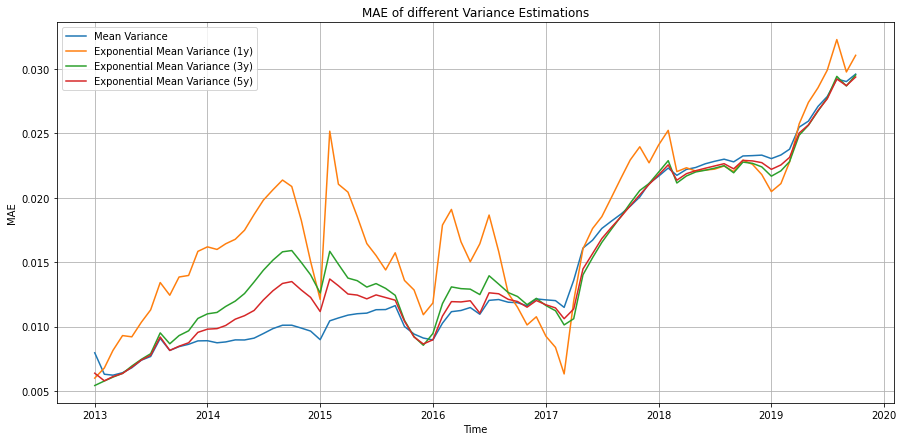

In [8]:
fig, ax = plt.subplots(figsize=(15,7), facecolor='white')

ax.plot(out, label=out.columns)

ax.set_xlabel('Time')
ax.legend()
ax.set_ylabel('MAE')
ax.set_title("MAE of different Variance Estimations")
ax.grid()